# Assignment 1 Group no. [enter]
### Project members: 
Sevket Melih Zenciroglu, smzen@kth.se


### Declaration:
By submitting this solution, it is hereby declared that all individuals listed above have contributed to the solution, either with code that appear in the final solution below, or with code that has been evaluated and compared to the final solution, but for some reason has been excluded. It is also declared that all project members fully understand all parts of the final solution and can explain it upon request.

It is furthermore declared that the code below is a contribution by the project members only, and specifically that no part of the solution has been copied from any other source (except for lecture slides at the course ID2214) and no part of the solution has been provided by someone not listed as project member above.

It is furthermore declared that it has been understood that no other library/package than the Python 3 standard library, NumPy and pandas may be used in the solution for this assignment.

### Instructions
All assignments starting with number 1 below are mandatory. Satisfactory solutions
will give 1 point (in total). If they in addition are good (all parts work more or less 
as they should), completed on time (submitted before the deadline in Canvas) and according
to the instructions, together with satisfactory solutions of assignments starting with 
number 2 below, then the assignment will receive 2 points (in total).

It is highly recommended that you do not develop the code directly within the notebook
but that you copy the comments and test cases to your regular development environment
and only when everything works as expected, that you paste your functions into this
notebook, do a final testing (all cells should succeed) and submit the whole notebook 
(a single file) in Canvas (do not forget to fill in your group number and names above).


## Load NumPy and pandas

In [22]:
import numpy as np
import pandas as pd

## 1a. Create and apply normalization

In [23]:
# Insert the functions create_normalization and apply_normalization below (after the comments)
#
# Input to create_normalization:
# df: a dataframe (where the column names "CLASS" and "ID" have special meaning)
# normalizationtype: "minmax" (default) or "zscore"
#
# Output from create_normalization:
# df: a new dataframe, where each numeric value in a column has been replaced by a normalized value
# normalization: a mapping (dictionary) from each column name to a triple, consisting of
#                ("minmax",min_value,max_value) or ("zscore",mean,std)
#
# Hint 1: First copy the input dataframe and modify the copy (the input dataframe should be kept unchanged)
# Hint 2: Consider columns of type "float" or "int" only (and which are not labeled "CLASS" or "ID"),
#         the other columns should remain unchanged
# Hint 3: Take a close look at the lecture slides on data preparation
#
# Input to apply_normalization:
# df: a dataframe
# normalization: a mapping (dictionary) from column names to triples (see above)
#
# Output from apply_normalization:
# df: a new dataframe, where each numerical value has been normalized according to the mapping
#
# Hint 1: First copy the input dataframe and modify the copy (the input dataframe should be kept unchanged)
# Hint 2: For minmax-normalization, you may consider to limit the output range to [0,1]

def create_normalization(df, normalizationtype="minmax"):
    normalized_df = df.copy()    
    columns = normalized_df.columns
    #Col_Df = normalized_df.dtypes
    
    # create a dictionary to save the normalization data
    normalization = {}

    for col in columns:
        if (col != 'CLASS' and col != 'ID') and (normalized_df[col].dtype == 'float64' or normalized_df[col].dtype == 'int64'):
            if normalizationtype == 'minmax':
                min = normalized_df[col].min()
                max = normalized_df[col].max()
                normalization[col] = ('minmax', min, max)
                normalized_df[col] = [(x-min)/(max-min) for x in normalized_df[col]]
            
            elif normalizationtype == 'zscore':            
                mean = normalized_df[col].mean()
                std = normalized_df[col].std()
                normalization[col] = ('zscore', mean, std)
                normalized_df[col] = normalized_df[col].apply(lambda x: (x-mean)/std)
    
    return normalized_df, normalization

def apply_normalization(df, normalization):
    normalized_df = df.copy()  
    columns = normalized_df.columns
    Col_Df = normalized_df.dtypes
    col_num = 0
    normalizationtype = normalization['RI'][0]
    
    for col in columns:
        if (col != 'CLASS' and col != 'ID') and (normalized_df[col].dtype == 'float64' or normalized_df[col].dtype == 'int64'):
            if normalizationtype == 'minmax':
                min = normalization[col][1]
                max = normalization[col][2]
                normalization[col] = ('minmax', min, max)
                normalized_df[col] = [(x-min)/(max-min) for x in normalized_df[col]]
            
            elif normalizationtype == 'zscore':
                mean = normalization[col][1]
                std = normalization[col][2]
                normalization[col] = ('zscore', mean, std)
                normalized_df[col] = [(x-min)/(max-min) for x in normalized_df[col]]        
        
    return normalized_df

In [24]:
# Test your code (leave this part unchanged)

glass_train_df = pd.read_csv("glass_train.txt")

glass_test_df = pd.read_csv("glass_test.txt")

glass_train_norm, normalization = create_normalization(glass_train_df,normalizationtype="minmax")

print("normalization:\n")
for f in normalization:
    print("{}:{}".format(f,normalization[f]))
    
glass_test_norm = apply_normalization(glass_test_df,normalization)
print("\nglass_test_norm:\n")

'''
Col_Df = glass_test_norm.dtypes

print(isinstance(Col_Df[1], object))
print(glass_test_norm[columns[1]].dtype)

#### below basic dtype check didn't work properly when I checked for int and float so I had to check as above
print(isinstance(glass_test_norm[columns[1]], float))
print(glass_test_norm[columns[1]].dtype == 'float64')

print(Col_Df)
'''

# set below options if you want to see all data in dataframe, otherwise jupyter shows some of it from the top and the bottom
#pd.set_option('display.max_columns', None)  # or 1000
#pd.set_option('display.max_rows', None)
glass_test_norm
# i.e. by default usage, you can't see below rows. you see them only after the above settings or if you specifically call them
#glass_test_norm.iloc[30:77,:]

normalization:

RI:('minmax', 1.51131, 1.53125)
Na:('minmax', 10.73, 15.79)
Mg:('minmax', 0.0, 4.49)
Al:('minmax', 0.29, 3.04)
Si:('minmax', 69.81, 75.18)
K:('minmax', 0.0, 6.21)
Ca:('minmax', 5.43, 14.68)
Ba:('minmax', 0.0, 3.15)
Fe:('minmax', 0.0, 0.37)

glass_test_norm:



,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,CLASS
0,101,0.262788,0.399209,0.634744,0.418182,0.644320,0.091787,0.363243,0.034921,0.594595,2
1,104,0.799398,0.606719,0.701559,0.134545,0.141527,0.012882,0.671351,0.000000,0.000000,2
2,44,0.541123,0.592885,0.855234,0.156364,0.363128,0.027375,0.465946,0.000000,0.000000,1
3,17,0.327482,0.385375,0.817372,0.316364,0.614525,0.098229,0.353514,0.000000,0.000000,1
4,81,0.231194,0.420949,0.783964,0.665455,0.530726,0.111111,0.274595,0.000000,0.000000,2
5,142,0.361083,0.488142,0.808463,0.283636,0.562384,0.091787,0.322162,0.028571,0.459459,2
6,120,0.261284,0.559289,0.795100,0.429091,0.491620,0.103060,0.273514,0.000000,0.000000,2
7,123,0.278837,0.494071,0.788419,0.432727,0.564246,0.090177,0.288649,0.000000,0.000000,2
8,133,0.342026,0.533597,0.886414,0.323636,0.499069,0.093398,0.294054,0.000000,0.000000,2
9,185,-0.008024,1.314229,0.000000,0.018182,1.042831,0.000000,0.131892,0.000000,0.000000,6


### Comment on assumptions, things that do not work properly, etc.


## 1b. Create and apply imputation

In [25]:
# Insert the functions create_imputation and apply_imputation below (after the comments)
#
# Input to create_imputation:
# df: a dataframe (where the column names "CLASS" and "ID" have special meaning)
#
# Output from create_imputation:
# df: a new dataframe, where each missing numeric value in a column has been replaced by the mean of that column 
#     and each missing categoric value in a column has been replaced by the mode of that column
# imputation: a mapping (dictionary) from column name to value that has replaced missing values
#
# Hint 1: First copy the input dataframe and modify the copy (the input dataframe should be kept unchanged)
# Hint 2: Handle columns of type "float" or "int" only (and which are not labeled "CLASS" or "ID") in one way
#         and columns of type "object" and "category" in other ways
# Hint 3: Consider using the pandas functions mean() and mode() respectively, as well as fillna
# Hint 4: In the rare case of all values in a column being missing, replace numeric values with 0,
#         object values with "" and category values with the first category (cat.categories[0])  
#
# Input to apply_imputation:
# df: a dataframe
# imputation: a mapping (dictionary) from column name to value that should replace missing values
#
# Output from apply_imputation:
# df: a new dataframe, where each missing value has been replaced according to the mapping
#
# Hint 1: First copy the input dataframe and modify the copy (the input dataframe should be kept unchanged)
# Hint 2: Consider using fillna

def create_imputation(df):
    replaced_df = df.copy()
    columns = replaced_df.columns

    # create a dictionary to save the normalization data
    imputation = {}
    
    for col in columns:
    #while col_num < len(columns):        
        if col != 'CLASS' and col != 'ID':
            if (replaced_df[col].dtype == 'float64' or replaced_df[col].dtype == 'int64'):
                if np.isnan(replaced_df[col].values).all():
                    replaced_df[col].fillna(0, inplace=True)
                    imputation[col] = 0
                else:
                    replaced_df[col].fillna(replaced_df[col].mean(), inplace=True)
                    imputation[col] = replaced_df[col].mean()
            elif replaced_df[col].dtype == 'object':
                #if np.isnan(replaced_df[columns[col_num]].values).all():
                if pd.isnull(replaced_df[col].values).all():
                    replaced_df[col].fillna("", inplace=True)
                    imputation[col] = ""
                else:
                    replaced_df[col].fillna(replaced_df[col].mode()[0], inplace=True)
                    imputation[col] = replaced_df[col].mode()[0]
            elif replaced_df[co].dtype == 'category':
                if np.isnan(replaced_df[col].values).all():
                    replaced_df[col].fillna(replaced_df[col].cat.categories[0], inplace=True)
                    imputation[col] = replaced_df[col].cat.categories[0]
                else:
                    replaced_df[col].fillna(replaced_df[col].mode()[0], inplace=True)
                    imputation[col] = replaced_df[col].mode()[0]
        
    return replaced_df, imputation

def apply_imputation(df, imputation):
    replaced_df = df.copy()
    columns = replaced_df.columns
    #Col_Df = replaced_df.dtypes
    # create a dictionary to save the normalization data
        
    for col in columns:
        if col != 'CLASS' and col != 'ID':
            replaced_df[col].fillna(imputation[col], inplace=True)
        
    return replaced_df

In [26]:
# Test your code (leave this part unchanged)

anneal_train_df = pd.read_csv("anneal_train.txt")
anneal_test_df = pd.read_csv("anneal_test.txt")

anneal_train_imp, imputation = create_imputation(anneal_train_df)
anneal_test_imp = apply_imputation(anneal_test_df,imputation)

print("Imputation:\n")
for f in imputation:
    print("{}:{}".format(f,imputation[f]))

print("\nNo. of replaced missing values in training data:\n{}".format(anneal_train_imp.count()-anneal_train_df.count()))
print("\nNo. of replaced missing values in test data:\n{}".format(anneal_test_imp.count()-anneal_test_df.count()))



Imputation:

family:TN
product-type:C
steel:A
carbon:3.859688195991091
hardness:13.084632516703786
temper_rolling:T
condition:S
formability:2.2517482517482557
strength:26.302895322939868
non-ageing:N
surface-finish:P
surface-quality:E
enamelability:1.7142857142857018
bc:Y
bf:Y
bt:Y
bw/me:B
bl:Y
m:0
chrom:C
phos:P
cbond:Y
marvi:0
exptl:0
ferro:Y
corr:0
blue-bright-varn-clean:B
lustre:Y
jurofm:0
s:0
p:0
shape:SHEET
thick:1.1911937639198227
width:769.4917594654789
len:1229.293986636971
oil:Y
bore:35.18930957683742
packing:3.0

No. of replaced missing values in training data:
family                    382
product-type                0
steel                      43
carbon                      0
hardness                    0
temper_rolling            374
condition                 160
formability               163
strength                    0
non-ageing                391
surface-finish            444
surface-quality           128
enamelability             442
bc                        448
b

### Comment on assumptions, things that do not work properly, etc.

## 1c. Create and apply discretization

In [27]:
# Insert the functions create_bins and apply_bins below
#
# Input to create_bins:
# df: a dataframe
# nobins: no. of bins (default = 10)
# bintype: either "equal-width" (default) or "equal-size" 
#
# Output from create_bins:
# df: a new dataframe, where each numeric feature value has been replaced by a categoric (corresponding to some bin)
# binning: a mapping (dictionary) from column name to bins (threshold values for the bin)
#
# Hint 1: First copy the input dataframe and modify the copy (the input dataframe should be kept unchanged)
# Hint 2: Discretize columns of type "float" or "int" only (and which are not labeled "CLASS" or "ID")
# Hint 3: Consider using pd.cut and pd.qcut respectively, with labels=False, retbins=True and duplicates="drop"
#         (the last option will avoid errors when not enough bins can be created)
# Hint 4: Set all columns in the new dataframe to be of type "category"
# Hint 5: Set the categories of the discretized features to be [0,...,nobins-1]
# Hint 6: Change the first and the last element of each binning to -np.inf and np.inf respectively 
#
# Input to apply_bins:
# df: a dataframe
# binning: a mapping (dictionary) from column name to bins (threshold values for the bin)
#
# Output from apply_bins:
# df: a new dataframe, where each numeric feature value has been replaced by a categoric (corresponding to some bin)
#
# Hint 1: First copy the input dataframe and modify the copy (the input dataframe should be kept unchanged)
# Hint 2: Consider using pd.cut 
# Hint 3: Set all columns in the new dataframe to be of type "category"
# Hint 4: Set the categories of the discretized features to be [0,...,nobins-1]
#

def create_bins(df, nobins = 10, bintype = "equal-width"):
    cat_df = df.copy()
    columns = cat_df.columns
    
    binning = {}
    
    for col in columns:
        #if (col != 'CLASS' and col != 'ID') and (cat_df[col].dtype == 'float64' or cat_df[col].dtype == 'int64'):
        if (col != 'CLASS' and col != 'ID') and (cat_df[col].dtype in ['float64', 'float32', 'int64', 'int32']):
            if(bintype == 'equal-width'):
                cat_df[col], bins = pd.cut(cat_df[col], nobins, retbins=True, labels=False)                
            else:
                cat_df[col], bins = pd.qcut(cat_df[col], nobins, retbins=True, labels = False, duplicates='drop') 
            #bins = np.append(-np.inf, bins)
            #bins = np.append(bins, np.inf)
            bins[0] = -np.inf
            bins[-1] = np.inf
            binning[col] = bins            
            #cat_df = cat_df.astype({col: category})  # should work, too
            cat_df[col] = cat_df[col].astype("category")
            cat_df[col] = cat_df[col].cat.set_categories([str(i) for i in cat_df[col].cat.categories], rename = True)
            #cat_df[col] = cat_df[col].cat.set_categories(bins)
            #cat_df[col] = pd.cut(cat_df[col], binning[col])
    
    return cat_df, binning

def apply_bins(df, binning):
    cat_df = df.copy()
    columns = cat_df.columns
    
    for col in columns:
        #if (col != 'CLASS' and col != 'ID') and (cat_df[col].dtype == 'float64' or cat_df[col].dtype == 'int64'):
        if (col != 'CLASS' and col != 'ID') and (cat_df[col].dtype in ['float64', 'float32', 'int64', 'int32']):
            #cat_df[col] = pd.cut(cat_df[col], binning[col])
            bins = binning[col]
            cat_df[col] = pd.cut(cat_df[col],bins,labels=False)
            cat_df[col] = cat_df[col].astype("category")
            cat_df[col] = cat_df[col].cat.set_categories([str(i) for i in cat_df[col].cat.categories], rename = True)
    return cat_df

In [28]:
# Test your code  (leave this part unchanged)

glass_train_df = pd.read_csv("glass_train.txt")

glass_test_df = pd.read_csv("glass_test.txt")

glass_train_disc, binning = create_bins(glass_train_df,nobins=10,bintype="equal-size")
print("binning:\n")
for f in binning:
    print("{}:{}".format(f,binning[f]))
    
glass_test_disc = apply_bins(glass_test_df,binning)
print("\nglass_test_disc:\n")
glass_test_disc



binning:

RI:[    -inf 1.515896 1.51618  1.516516 1.516866 1.51753  1.517902 1.518618
 1.520114 1.521846      inf]
Na:[  -inf 12.73  12.872 13.    13.222 13.38  13.492 13.794 14.198 14.82
    inf]
Mg:[ -inf 1.82  3.188 3.41  3.476 3.55  3.61  3.728   inf]
Al:[ -inf 0.906 1.172 1.23  1.348 1.48  1.54  1.622 1.808 2.094   inf]
Si:[  -inf 71.756 72.196 72.388 72.72  72.79  72.966 73.06  73.208 73.372
    inf]
K:[ -inf 0.006 0.148 0.39  0.54  0.576 0.6   0.636 0.67    inf]
Ca:[  -inf  7.978  8.112  8.338  8.554  8.67   8.81   9.032  9.674 10.924
    inf]
Ba:[-inf 0.78  inf]
Fe:[ -inf 0.062 0.118 0.24    inf]

glass_test_disc:



,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,CLASS
0,101,3,1,1,4,8,4,5,0,2,2
1,104,9,7,1,0,0,1,9,0,0,2
2,44,9,6,7,0,1,2,8,0,0,1
3,17,5,0,6,1,7,6,5,0,0,1
4,81,1,1,4,9,3,8,0,0,0,2
5,142,6,3,6,1,5,4,3,0,2,2
6,120,3,6,5,4,3,7,0,0,0,2
7,123,4,4,4,4,5,4,1,0,0,2
8,133,6,5,7,2,3,5,2,0,0,2
9,185,0,9,0,0,9,0,0,0,0,6


### Comment on assumptions, things that do not work properly, etc.

## 1d. Divide a dataset into a training and a test set

In [29]:
# Insert the function split below
#
# Input to split:
# df: a dataframe
# testfraction: a float in the range (0,1) (default = 0.5)
#
# Output from split:
# trainingdf: a dataframe consisting of a random sample of (1-testfraction) of the rows in df
# testdf: a dataframe consisting of the rows in df that are not included in trainingdf
#
# Hint: You may use np.random.permutation(df.index) to get a permuted list of indexes where a 
#       prefix corresponds to the test instances, and the suffix to the training instances 

import math

def split(df, testfraction = 0.5):
    copy_df = df.copy()
    # NOTE: Shuffling can be achived as below
    #copy_df = copy_df.iloc[np.random.permutation(len(df))]   # both this one and the below work
    #copy_df = copy_df.iloc[np.random.permutation(df.index)]
    #testdf = df.iloc[:int(len(copy_df)*testfraction), :]s
    #trainingdf = df.iloc[int(len(copy_df)*testfraction):, :]    
    testdf = copy_df.iloc[:math.ceil(len(df)*testfraction), :]
    trainingdf = copy_df.iloc[math.ceil(len(df)*testfraction):, :]
    return trainingdf, testdf

In [30]:
# Test your code  (leave this part unchanged)

glass_df = pd.read_csv("glass.txt")

glass_train, glass_test = split(glass_df,testfraction=0.25)

print("Training IDs:\n{}".format(glass_train["ID"].values))

print("\nTest IDs:\n{}".format(glass_test["ID"].values))

print("\nOverlap: {}".format(set(glass_train["ID"]).intersection(set(glass_test["ID"]))))


Training IDs:
[ 55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214]

Test IDs:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54]

Overlap: set()


### Comment on assumptions, things that do not work properly, etc.

## 1e. Calculate accuracy of a set of predictions

In [31]:
# Insert the function accuracy below
#
# Input to accuracy:
# df: a dataframe with class labels as column names and each row corresponding to
#     a prediction with estimated probabilities for each class
# correctlabels: an array (or list) of the correct class label for each prediction
#                (the number of correct labels must equal the number of rows in df)
#
# Output from accuracy:
# accuracy: the fraction of cases for which the predicted class label coincides with the correct label
#
# Hint: In case the label receiving the highest probability is not unique, you may
#       resolve that by picking the first (as ordered by the column names) or 
#       by randomly selecting one of the labels with highest probaility.

def accuracy(df, correctlabels):
    max_vals = predictions.max(axis=1)
    predict_max = np.zeros(5, dtype=str)
    correct_prediction = 0
    
    for i in range(len(predictions)):    
        for col in predictions.columns:
            if predictions[col].values[i] == max_vals[i]:
                predict_max[i] = col
                if col == correctlabels[i]:
                    correct_prediction += 1                
                break
                
    return correct_prediction/len(predictions)
    

In [32]:
# Test your code  (leave this part unchanged)

predictions = pd.DataFrame({"A":[0.5,0.5,0.5,0.25,0.25],"B":[0.5,0.25,0.25,0.5,0.25],"C":[0.0,0.25,0.25,0.25,0.5]})
predictions


,A,B,C
0,0.50,0.50,0.00
1,0.50,0.25,0.25
2,0.50,0.25,0.25
3,0.25,0.50,0.25
4,0.25,0.25,0.50


In [33]:
correctlabels = ["B","A","B","B","C"]

accuracy(predictions,correctlabels) # Note that depending on how ties are resolved the accuracy may be 0.6 or 0.8

0.6

### Comment on assumptions, things that do not work properly, etc.

## 2a. Create and apply one-hot encoding

In [34]:
# Insert the functions create_one_hot and apply_one_hot below
#
# Input to create_one_hot:
# df: a dataframe
#
# Output from create_one_hot:
# df: a new dataframe, where each categoric feature has been replaced by a set of binary features 
#    (as many new features as there are possible values)
# one_hot: a mapping (dictionary) from column name to a set of categories (possible values for the feature)
#
# Hint 1: First copy the input dataframe and modify the copy (the input dataframe should be kept unchanged)
# Hint 2: Consider columns of type "object" or "category" only (and which are not labeled "CLASS" or "ID")
# Hint 3: Consider creating new column names by merging the original column name and the categorical value
# Hint 4: Set all new columns to be of type "float"
# Hint 5: Do not forget to remove the original categoric feature
#
# Input to apply_one_hot:
# df: a dataframe
# one_hot: a mapping (dictionary) from column name to categories
#
# Output from apply_one_hot:
# df: a new dataframe, where each categoric feature has been replaced by a set of binary features
#
# Hint: See the above Hints

def create_one_hot(df):
    copy_df = df.copy()
    categories = {} # one_hot
    ## NOTE: I considered each column/feature can have different category groups but it seems like they all have
    ## the same groups. If we consider all wiil have the same categories, it would be easier.
    
    columns = copy_df.columns
    new_columns = list() # new_columns = []
    new_columns.append('CLASS')
    
    for col in columns:
        if (col != 'CLASS' and col != 'ID') and (copy_df[col].dtype == 'object' or copy_df[col].dtype == 'category'):
            #binary_df.rename(columns={col:col+, 'lifeExp':'life_exp', 'gdpPercap':'gdp_per_cap'}, inplace=True)
            copy_df[col] = copy_df[col].astype("category")
            categories[col] = copy_df[col].cat.categories
            for i in range(len(categories[col])):
                new_columns.append(col + '-' + categories[col][i])
    
    data_temp = np.zeros((len(copy_df), len(new_columns)) ,float)
    #binX_df = pd.DataFrame(xx, columns = new_columns, index=train_df.index.values)
    binary_df = pd.DataFrame(data_temp, columns = new_columns, index = copy_df.index.values)
        
    for row_num in range(len(copy_df)):
        #for col_num in range(len(copy_df.columns))
        for col in columns:
            if col == 'CLASS':
                binary_df[col] = copy_df[col].values[row_num]
            else:
                for i in range(len(categories[col])):
                    if copy_df[col].values[row_num] == categories[col][i]:
                        binary_df[(col + '-' + categories[col][i])].values[row_num] = 1.0
                        break;  

    return binary_df, categories

# one_hot == categories
def apply_one_hot(df, categories):
    copy_df = df.copy()
    columns = copy_df.columns
    new_columns = list() # new_columns = []
    new_columns.append('CLASS')
    
    for col in columns:
        if (col != 'CLASS' and col != 'ID') and (copy_df[col].dtype == 'object' or copy_df[col].dtype == 'category'):
            #binary_df.rename(columns={col:col+, 'lifeExp':'life_exp', 'gdpPercap':'gdp_per_cap'}, inplace=True)
            copy_df[col] = copy_df[col].astype("category")
            categories[col] = copy_df[col].cat.categories
            for i in range(len(categories[col])):
                new_columns.append(col + '-' + categories[col][i])
   
    data_temp = np.zeros((len(copy_df), len(new_columns)) ,float)
    #binX_df = pd.DataFrame(xx, columns = new_columns, index=train_df.index.values)
    binary_df = pd.DataFrame(data_temp, columns = new_columns, index = copy_df.index.values)
    ###binary_df = pd.DataFrame(copy_df, columns = new_columns)
        
    for row_num in range(len(copy_df)):
        #for col_num in range(len(copy_df.columns))
        for col in columns:
            if col == 'CLASS':
                binary_df[col] = copy_df[col].values[row_num]
            else:
                for i in range(len(categories[col])):
                    if copy_df[col].values[row_num] == categories[col][i]:
                        binary_df[(col + '-' + categories[col][i])].values[row_num] = 1.0
                        break;  

    return binary_df

In [35]:
# Test your code  (leave this part unchanged)

tictactoe = pd.read_csv("tic-tac-toe.txt")

train_df, test_df = split(tictactoe) # Using your above function

new_train, one_hot = create_one_hot(train_df)

new_test = apply_one_hot(test_df,one_hot)

new_test



## NOTE: The values are matching with the values in the question except the INDEX values. It should be double checked
## I also believe that there should be an easier way to do these calculations... Will think about it later..

,CLASS,top-left-square-o,top-left-square-x,top-middle-square-b,top-middle-square-o,top-middle-square-x,top-right-square-b,top-right-square-o,top-right-square-x,middle-left-square-b,...,middle-right-square-x,bottom-left-square-b,bottom-left-square-o,bottom-left-square-x,bottom-middle-square-b,bottom-middle-square-o,bottom-middle-square-x,bottom-right-square-b,bottom-right-square-o,bottom-right-square-x
0,positive,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,positive,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,positive,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,positive,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,positive,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,positive,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,positive,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,positive,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,positive,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,positive,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Comment on assumptions, things that do not work properly, etc.

## 2b. Divide a dataset into a number of folds

In [36]:
# Insert the function folds below
#
# Input to folds:
# df: a dataframe
# nofolds: an integer greater than 1 (default = 10)
#
# Output from folds:
# folds: a list (of length = nofolds) dataframes consisting of random non-overlapping, 
#        approximately equal-sized subsets of the rows in df
#
# Hint: You may use np.random.permutation(df.index) to get a permuted list of indexes from which a 
#       prefix corresponds to the test instances, and the suffix to the training instances 

def folds(df, nofolds = 10):
    index_shuffling = np.random.permutation(df.index)
    #print('index_shuffling=', index_shuffling)
    intervals = [int(i * df.shape[0] / nofolds) for i in range(nofolds + 1)]
    #print('intervals=', intervals)
    folds = [df.iloc[intervals[i]:intervals[i + 1], :] for i in range(nofolds)]
    #print('folds=', folds)
    return folds

#glass_df = pd.read_csv("glass.txt")

#glass_folds = folds(glass_df,nofolds=5)

In [37]:
# Test your code  (leave this part unchanged)

glass_df = pd.read_csv("glass.txt")

glass_folds = folds(glass_df,nofolds=5)

fold_sizes = [len(f) for f in glass_folds]

print("Fold sizes:{}\nTotal no. instances: {}".format(fold_sizes,sum(fold_sizes)))

Fold sizes:[42, 43, 43, 43, 43]
Total no. instances: 214


### Comment on assumptions, things that do not work properly, etc.

## 2c. Calculate Brier score of a set of predictions

In [38]:
# Insert the function brier_score below
#
# Input to brier_score:
# df: a dataframe with class labels as column names and each row corresponding to
#     a prediction with estimated probabilities for each class
# correctlabels: an array (or list) of the correct class label for each prediction
#                (the number of correct labels must equal the number of rows in df)
#
# Output from brier_score:
# brier_score: the average square error of the predicted probabilties 
#
# Hint: Compare each predicted vector to a vector for each correct label, which is all zeros except 
#       for at the index of the correct class. The index can be found using np.where(df.columns==l)[0] 
#       where l is the correct label.


def brier_score(df, correctlabels):
    data_temp = np.zeros((len(correctlabels), len(df.columns)) ,float)
    correct_df = pd.DataFrame(data_temp, columns = df.columns)
    square_errors = 0
    row_num = len(correct_df)
        
    for i in range(row_num):    
        for col in correct_df.columns:
            if col == correctlabels[i]:
                correct_df[col].values[i] = 1
                break
    
    #print('------------')
    for i in range(row_num):
        #print('i=',i)        
        sq_err = (correct_df.iloc[i,:] - df.iloc[i,:])**2
        #print('sq_err=', sq_err)
        #print('np.sum(sq_err)=', np.sum(sq_err))
        square_errors += np.sum(sq_err)
          
    return square_errors/row_num

In [39]:
# Test your code  (leave this part unchanged)

predictions = pd.DataFrame({"A":[0.5,0.5,0.5,0.25,0.25],"B":[0.5,0.25,0.25,0.5,0.25],"C":[0.0,0.25,0.25,0.25,0.5]})

correctlabels = ["B","A","B","B","C"]

brier_score(predictions,correctlabels)

0.5

### Comment on assumptions, things that do not work properly, etc.

## 2d. Calculate AUC of a set of predictions

In [42]:
# Insert the function auc below
#
# Input to auc:
# df: a dataframe with class labels as column names and each row corresponding to
#     a prediction with estimated probabilities for each class
# correctlabels: an array (or list) of the correct class label for each prediction
#                (the number of correct labels must equal the number of rows in df)
#
# Output from auc:
# auc: the weighted area under ROC curve
#
# Hint 1: Calculate the binary AUC first for each class label c, i.e., treating the
#         predicted probability of this class for each instance as a score; the positive
#         instances are the ones belonging to class c and the negative instances the rest
# Hint 2: When calculating the binary AUC, first find the scores of the positive instances and then
#         the scores of the negative instances
# Hint 3: You may use a dictionary with a mapping from each score to an array of two numbers; 
#         the number of positive instances with this score and the number of negative instances with this score
# Hint 4: Created a (reversely) sorted (on the scores) list of pairs from the dictionary and
#         iterate over this to additively calculate the AUC
# Hint 5: For each pair in the above list, there are three cases to consider; the no. of true positives
#         (tp_i) is zero, the number of false positives (fp_i) (negatives) is zero, and both are non-zero
# Hint 6: Calculate the weighted AUC by summing the individual AUCs weighted by the relative
#         frequency of each class (as estimated from the correct labels)

def find_pos_neg_inst_scores(prediction_column, correct_labels, column_name):
    prediction_column_array = np.array(prediction_column)
    binary_AUC = [column_name == i for i in correct_labels] 
    # print('binary_AUC=', binary_AUC)
    # positive_instance_scores => Col-Name (predicted class) matches with the correct class
    positive_instance_scores = prediction_column_array[binary_AUC]
    # negative_instance_scores => Col-Name (predicted class) DOES NOT match with the correct class
    negative_instance_scores = prediction_column_array[~np.array(binary_AUC)]
      
    #print('positive_instance_scores=', positive_instance_scores)
    #print('negative_instance_scores=', negative_instance_scores)
    
    return positive_instance_scores, negative_instance_scores

# fpr=False_Positive_Rate
# tpr=True_Positive_Rate
def get_tpr_fpr(prediction_column, correct_labels, column_name):
    positive_instance_scores, negative_instance_scores = find_pos_neg_inst_scores(prediction_column, correct_labels, column_name)
    scores_extended = [0]
    scores_extended += sorted(prediction_column)
    scores_extended += [1]
    print('scores_extended=',scores_extended)
    dict_tpr_fpr = {}
    for predicted_score in scores_extended:
        if(len(negative_instance_scores)==0):
            count_false_pos_instances = 0
        else:
            count_false_pos_instances = np.sum(negative_instance_scores >= predicted_score)/len(negative_instance_scores)
        
        if(len(positive_instance_scores)==0):
            count_true_pos_instances = 0
        else:
            count_true_pos_instances = np.sum(positive_instance_scores >= predicted_score)/len(positive_instance_scores)
            
        #dict_tpr_fpr[predicted_score] = [count_false_pos_instances, count_true_pos_instances]
        dict_tpr_fpr[predicted_score] = [count_true_pos_instances, count_false_pos_instances]
        
    list_reversed_tpr_fpr = [i for i in reversed(list(dict_tpr_fpr.values()))]
    print('list_reversed_tpr_fpr=', list_reversed_tpr_fpr)
    return list_reversed_tpr_fpr

def calculate_AUC(list_reversed_tpr_fpr):
    # AUC = Area under ROC curve
    AUC = 0
    n_tpr_fpr = len(list_reversed_tpr_fpr)
    for i in range(n_tpr_fpr - 1):        
        if(list_reversed_tpr_fpr[i][1] != list_reversed_tpr_fpr[i + 1][1]):
            # if fpr is changing but tpr is not changing then the area is a square=a*b=(tpr[i+1]-0)*(fpr[i+1]-fpr[i])
            if(list_reversed_tpr_fpr[i][0] == list_reversed_tpr_fpr[i + 1][0]):
                AUC += list_reversed_tpr_fpr[i + 1][0]*(list_reversed_tpr_fpr[i + 1][1] - list_reversed_tpr_fpr[i][1])
            else:
                # if both are changing then the area is a trapezoid=(a+b)*h/2=(tpr[i]+tpr[i+1])*(fpr[i+1]-fpr[i])/2
                AUC += (list_reversed_tpr_fpr[i + 1][0] + list_reversed_tpr_fpr[i][0])*(list_reversed_tpr_fpr[i + 1][1] - list_reversed_tpr_fpr[i][1])/2
        
    return AUC
    
def auc(df, correctlabels):    
    class_frequency = dict(pd.Series(correctlabels).value_counts(normalize = True))    
    print(pd.Series(correctlabels).value_counts(normalize = True))
    AUC = 0
    
    for col in df.columns:
        prediction_vector = df[col]       
        list_reversed_tpr_fpr = get_tpr_fpr(prediction_vector, correctlabels, col)
        area_col = calculate_AUC(list_reversed_tpr_fpr)
        print('col={}__area_col={}'.format(col, area_col))
        AUC += class_frequency[col] * area_col
    return AUC

In [94]:
def count_tp_fp(predictions_df, correctlabels):
    #print('predictions_df', predictions_df) # last column includes the real values

    Score = predictions_df.iloc[:, 0]
    #print('Score=', Score)

    sorted_unique_score = np.unique(Score)[::-1]
    print('sorted_unique_score = ', sorted_unique_score)

    pos = np.zeros(len(sorted_unique_score))
    neg = np.zeros(len(sorted_unique_score))

    '''
    p = 0
    for s in range(len(sorted_unique_score)):
        while(sorted_unique_score[s] == predictions_df.iloc[p, 0]):
            if(sorted_unique_score[s] == predictions_df.iloc[p, 0]):
                if(predictions_df.columns[0] == correctlabels[p]):
                    pos[s] += 1
                else:
                    neg[s] += 1
            if(p == len(predictions_df) - 1):
                break
            else:
                p += 1
    
    '''
    for s in range(len(sorted_unique_score)):
        for p in range(len(predictions_df)):
            if(sorted_unique_score[s] == predictions_df.iloc[p, 0]):
                if(predictions_df.columns[0] == correctlabels[p]):
                    pos[s] += 1
                else:
                    neg[s] += 1
                    
    
    #print('pos=', pos)
    #print('neg=', neg)
    
    draw_ROC(pos, neg)
    
    return pos, neg

def draw_ROC(pos, neg):
    import matplotlib.pyplot as plt
    tpr = [cs/sum(pos) for cs in np.cumsum(pos)]
    print('tpr=', tpr)    
    fpr = [cs/sum(neg) for cs in np.cumsum(neg)]
    print('fpr=', fpr)
    plt.plot([0.0]+fpr+[1.0],[0.0]+tpr+[1.0],"-",label="1")
    plt.plot([0.0,1.0],[0.0,1.0],"--",label="Baseline")
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.legend()
    plt.show()

def calculate_AUC_Henrik_2(pos, neg):
    # AUC = Area under ROC curve
    AUC = 0
    Cov_tp = 0
    n_tp = len(pos)
    Tot_tp = sum(pos)
    Tot_fp = sum(neg)
    
    for i in range(n_tp):
        #print('i={}...pos[i]={}...neg[i]={}'.format(i, pos[i], neg[i]))        
        if(neg[i] == 0):
            Cov_tp += pos[i]
            #print('AUC_if = ', AUC)
        elif(pos[i] == 0):
            AUC += (Cov_tp/Tot_tp)*(neg[i]/Tot_fp)
            #print('AUC_elif = ', AUC)
        else:
            AUC += (Cov_tp/Tot_tp)*(neg[i]/Tot_fp) + (pos[i]/Tot_tp)*(neg[i]/Tot_fp)/2
            Cov_tp += pos[i]
            #print('AUC_else = ', AUC)
            
    return AUC

def auc_Henrik(df, correctlabels):    
    class_frequency = dict(pd.Series(correctlabels).value_counts(normalize = True))   
    print('class_frequency', class_frequency)
    AUC = 0
    #print(df.columns)
    #test_labels_unique = pd.Series(test_labels).value_counts(normalize = True)
    #print('correctlabels=', class_frequency.keys())
    for col in df.columns:
        if(col in class_frequency.keys()):
            print('col=', col)
            predictions_df = pd.DataFrame(df[col], columns=[col])
            #list_reversed_tpr_fpr = get_tpr_fpr(prediction_vector, correctlabels, col)
            pos, neg = count_tp_fp(predictions_df, correctlabels)
            #area_col = calculate_AUC(list_reversed_tpr_fpr)
            area_col = calculate_AUC_Henrik_2(pos, neg)            
            print('col={}__area_col={}'.format(col, area_col))
            AUC += class_frequency[col] * area_col        
    return AUC

In [106]:
# Test your code  (leave this part unchanged)

predictions = pd.DataFrame({"A":[0.9,0.9,0.6,0.55],"B":[0.1,0.1,0.4,0.45]})

correctlabels = ["A","B","B","A"]

groupByClass = predictions.groupby('B') 
#print(groupByClass.first())
print(groupByClass.count()/len(predictions))
class_freq = predictions.B.value_counts(normalize=True).sort_index()
print('class_freq=',class_freq)

#print('auc', auc(predictions,correctlabels))
#print('auc_Henrik', auc_Henrik(predictions,correctlabels))


         A
B         
0.10  0.50
0.40  0.25
0.45  0.25
class_freq= 0.10    0.50
0.40    0.25
0.45    0.25
Name: B, dtype: float64


class_frequency {'B': 0.6, 'A': 0.2, 'C': 0.2}
col= A
sorted_unique_score =  [0.5  0.25]
tpr= [1.0, 1.0]
fpr= [0.5, 1.0]


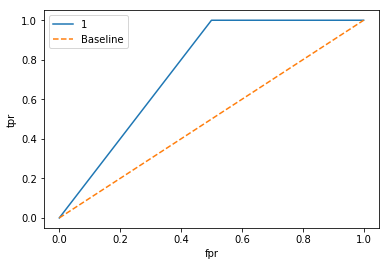

col=A__area_col=0.75
col= B
sorted_unique_score =  [0.5  0.25]
tpr= [0.6666666666666666, 1.0]
fpr= [0.0, 1.0]


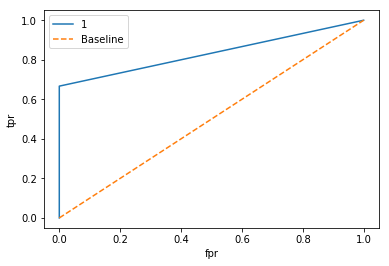

col=B__area_col=0.8333333333333333
col= C
sorted_unique_score =  [0.5  0.25 0.  ]
tpr= [1.0, 1.0, 1.0]
fpr= [0.0, 0.75, 1.0]


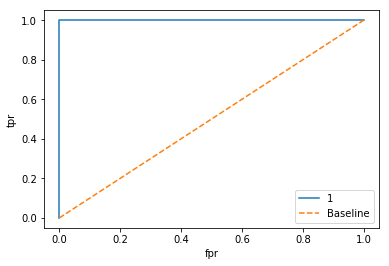

col=C__area_col=1.0


0.8499999999999999

In [101]:
predictions = pd.DataFrame({"A":[0.5,0.5,0.5,0.25,0.25],"B":[0.5,0.25,0.25,0.5,0.25],"C":[0.0,0.25,0.25,0.25,0.5]})

correctlabels = ["B","A","B","B","C"]

#auc(predictions,correctlabels)
auc_Henrik(predictions,correctlabels)

### Comment on assumptions, things that do not work properly, etc.